In [43]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [44]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [45]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [46]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [47]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [48]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [49]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [50]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [51]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [52]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | kapurthala
Processing Record 2 of Set 13 | hermanus
Processing Record 3 of Set 13 | butaritari
Processing Record 4 of Set 13 | albany
Processing Record 5 of Set 13 | zlynka
Processing Record 6 of Set 13 | jamestown
Processing Record 7 of Set 13 | yeppoon
Processing Record 8 of Set 13 | passo de camaragibe
Processing Record 9 of Set 13 | valleyview
Processing Record 10 of Set 13 | jian
Processing Record 11 of Set 13 | leningradskiy
Processing Record 12 of Set 13 | caravelas
Processing Record 13 of Set 13 | kapaa
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | norman wells
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | hasaki
Processing Record 18 of Set 13 | mae ramat
Processing Record 19 of Set 13 | barrow
Processing Record 20 of Set 13 | bengkulu
Processing Record 21 of Set 13 | svetlaya
Processing Record 22 of Set 13 | saskylakh
Processing Record 23 of Set 13 | saint-philippe
Processing Record 24 of

Processing Record 37 of Set 16 | arman
Processing Record 38 of Set 16 | anqing
Processing Record 39 of Set 16 | veraval
Processing Record 40 of Set 16 | itarema
Processing Record 41 of Set 16 | longyearbyen
Processing Record 42 of Set 16 | okhotsk
Processing Record 43 of Set 16 | labuhan
Processing Record 44 of Set 16 | lagoa
Processing Record 45 of Set 16 | san patricio
Processing Record 46 of Set 16 | bonthe
Processing Record 47 of Set 16 | ambilobe
Processing Record 48 of Set 16 | sur
Processing Record 49 of Set 16 | airai
Processing Record 50 of Set 16 | kabala
Processing Record 1 of Set 17 | yuanping
Processing Record 2 of Set 17 | colac
Processing Record 3 of Set 17 | barguzin
Processing Record 4 of Set 17 | cravo norte
Processing Record 5 of Set 17 | sao francisco
Processing Record 6 of Set 17 | saint-pierre
Processing Record 7 of Set 17 | imeni poliny osipenko
Processing Record 8 of Set 17 | banff
Processing Record 9 of Set 17 | klyuchi
Processing Record 10 of Set 17 | moissala

Processing Record 23 of Set 20 | sisimiut
Processing Record 24 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 25 of Set 20 | beringovskiy
Processing Record 26 of Set 20 | almeirim
Processing Record 27 of Set 20 | broome
Processing Record 28 of Set 20 | phonhong
Processing Record 29 of Set 20 | mangai
Processing Record 30 of Set 20 | puerto ayacucho
Processing Record 31 of Set 20 | evensk
Processing Record 32 of Set 20 | aksarayskiy
Processing Record 33 of Set 20 | zachagansk
City not found. Skipping...
Processing Record 34 of Set 20 | shetpe
Processing Record 35 of Set 20 | northam
Processing Record 36 of Set 20 | rocha
Processing Record 37 of Set 20 | cumana
Processing Record 38 of Set 20 | tiarei
Processing Record 39 of Set 20 | chuy
Processing Record 40 of Set 20 | komsomolskiy
Processing Record 41 of Set 20 | vallenar
Processing Record 42 of Set 20 | suntar
Processing Record 43 of Set 20 | hambantota
Processing Record 44 of Set 20 | yulara
Processing Record 4

Processing Record 5 of Set 24 | la oroya
Processing Record 6 of Set 24 | were ilu
Processing Record 7 of Set 24 | ikalamavony
Processing Record 8 of Set 24 | ola
Processing Record 9 of Set 24 | paradwip
City not found. Skipping...
Processing Record 10 of Set 24 | chapais
Processing Record 11 of Set 24 | pallasovka
Processing Record 12 of Set 24 | vila
Processing Record 13 of Set 24 | fare
Processing Record 14 of Set 24 | bloemhof
Processing Record 15 of Set 24 | vladimir
Processing Record 16 of Set 24 | bima
Processing Record 17 of Set 24 | orlik
Processing Record 18 of Set 24 | mount gambier
Processing Record 19 of Set 24 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 24 | pangkalanbuun
Processing Record 21 of Set 24 | nanortalik
Processing Record 22 of Set 24 | mocuba
Processing Record 23 of Set 24 | khandyga
Processing Record 24 of Set 24 | talaya
Processing Record 25 of Set 24 | dondo
Processing Record 26 of Set 24 | leninskoye
Processing Record 27 of Set 24 | 

In [54]:
len(city_data)

566

In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapurthala,31.38,75.38,93.20,56,37,12.75,IN,2020-06-21 05:40:53
1,Hermanus,-34.42,19.23,57.00,93,10,7.00,ZA,2020-06-21 05:40:53
2,Butaritari,3.07,172.79,83.73,76,69,12.59,KI,2020-06-21 05:40:53
3,Albany,42.60,-73.97,73.00,73,10,1.66,US,2020-06-21 05:40:53
4,Zlynka,52.43,31.74,69.80,83,75,8.95,RU,2020-06-21 05:40:54
5,Jamestown,42.10,-79.24,64.99,93,1,3.36,US,2020-06-21 05:40:43
6,Yeppoon,-23.13,150.73,75.20,44,90,6.40,AU,2020-06-21 05:40:56
7,Passo De Camaragibe,-9.24,-35.49,73.40,94,75,5.82,BR,2020-06-21 05:40:56
8,Valleyview,55.07,-117.29,54.27,97,100,5.75,CA,2020-06-21 05:40:56
9,Jian,27.12,114.98,92.03,63,100,8.37,CN,2020-06-21 05:40:56


In [57]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [61]:
# Import the time module.
import time

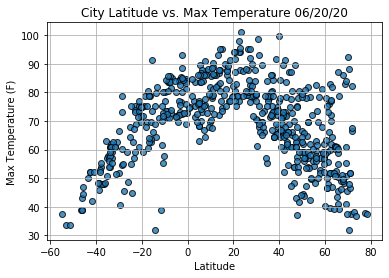

In [62]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

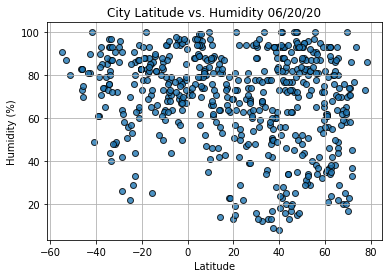

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

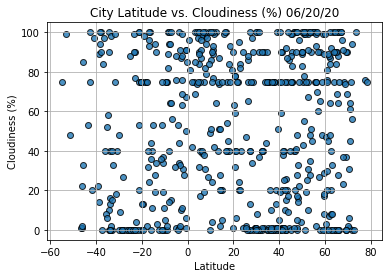

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

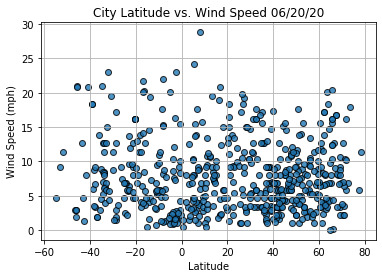

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()